# Introduction/Project Overview:
In this notebook, I will go over the World Health Organization Life Expectancy dataset. I found a version on kaggle that had been updated and had a higher usability score so I chose to use that. It is linked [here](https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated) if you want to read more about it. The dataset contains information about a countries and its population, health issues, life expectancy, etc for a given year. Our goal would be to create a model that can accurately determine the life expectency given a some characteristics on a population. Throughout this notebook I will visualize the data, explain some data preprocessing techniques, construct and evaluate models and analyze the results.

### Data Exploration & Preprocessing:
I will go over the dataset, analyzing its various features, checking for missing values, and gaining insights into the distribution of variables. Prior to building the models, I will preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features to ensure good model performance.

### Model Building & Evaluation:
In this notebook I will try implement a couple of models to try and see which ones are more accurate at predicting life expectancy. This is a supervised learning task since we are given the life expectancy of these population. Additionally this is a regression tasks because we are trying to predict a numerical value rather then put something into a category. For this notebook the models I chose is multiple polynomial regression and a neural network. Lastly I will interpret the results of each model. 

### Conclusion:
Finally, I will be discussing potential areas for model improvement, what stood out to me and what were some challanges. The conclusion serves more as a reflection for me on my time working on this notebook. This will serve as a good test for me to keep learning and testing my skills. Lets get to it!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Exploration & Preprocessing:
As mentioned earlier I got the dataset from kaggle. The link to that can be found above in the project overview. The download came with a csv file. Since I have it locally on my computer I can eassily access the data as shown below. Some of the first steps we will do before creating a model is to see what our data looks like.

In [3]:
data = pd.read_csv('./data.csv')

Lets take a look at the first couple of entries and the columns in our dataset.

In [4]:
data.head(5)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Costa Rica,Central America and Caribbean,2006,9.8,11.2,95.2200,4.19,88,86,26.4,...,89,0.16,9110,4.35,2.0,1.9,7.9,0,1,78.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2848 non-null   object 
 1   Region                       2848 non-null   object 
 2   Year                         2848 non-null   int64  
 3   Infant_deaths                2848 non-null   float64
 4   Under_five_deaths            2848 non-null   float64
 5   Adult_mortality              2848 non-null   float64
 6   Alcohol_consumption          2848 non-null   float64
 7   Hepatitis_B                  2848 non-null   int64  
 8   Measles                      2848 non-null   int64  
 9   BMI                          2848 non-null   float64
 10  Polio                        2848 non-null   int64  
 11  Diphtheria                   2848 non-null   int64  
 12  Incidents_HIV                2848 non-null   float64
 13  GDP_per_capita    

So we have 21 columns in total. We have two categorical columns and 19 numeric columns. There dosen't seem to be any missing values but we will double check later.

Lets see what other information we can get at a glance from our data. 

In [6]:
data.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.00000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000
mean,2007.500000,30.510955,43.150456,192.962955,4.833032,84.21875,77.250351,25.023455,86.456110,86.227879,0.898862,11430.386938,36.840976,4.886763,4.921173,7.604951,0.202247,0.797753,68.789010
std,4.610582,27.545025,44.604702,114.837818,3.989790,16.00973,18.667562,2.196260,15.111162,15.566384,2.387287,16916.391089,136.851020,4.441881,4.528915,3.159514,0.401746,0.401746,9.388885
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.00000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.200000,9.800000,108.346000,1.197500,78.00000,64.000000,23.200000,81.000000,81.000000,0.080000,1404.250000,2.070000,1.600000,1.600000,5.000000,0.000000,1.000000,62.675000
50%,2007.500000,19.800000,23.200000,164.422250,4.055000,89.00000,83.000000,25.500000,93.000000,93.000000,0.160000,4169.000000,7.925000,3.400000,3.400000,7.800000,0.000000,1.000000,71.300000
75%,2011.250000,47.725000,66.325000,248.099750,7.810000,96.00000,93.000000,26.400000,97.000000,97.000000,0.470000,12255.750000,23.850000,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.00000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


From the table we can see that
- the minimum life expectancy is 39 while the max is 83.
- The max adult mortality is 719 per thousand in population, while the min is 49.
- The average alcohol consumption per liters per capita is a lot lower than at I expected but the min is 0.00 which makes sense as some countries might have religious restrictions or laws against selling alchohol.
- Earliest recording is from 2000 and latest is 2015 

It is also very disturbing seeing the low immunization coverage for diseases such as polio, hepatitis b, and measles. Especially when the average immunization coverage is pretty high for them. Overall this table gives us some interesting information on the distribution of the data. Lets move on and see what other important things are on our data.

Below I am changing the column names to be lower case because they previously gave me issues the way it was originally formated. 

In [7]:
data.columns = data.columns.str.lower()

We are going to select the numerical and categorical columns so we can do some light data exploration.

In [8]:
numerical = data.select_dtypes(include=['float64', 'int64']).columns

In [9]:
categorical = data.select_dtypes(include=['object']).columns

Lets take a look at the averages of the numerical columns with respect to each of the regions.

In [10]:
pd.pivot_table(data, index='region', values=numerical)

,adult_mortality,alcohol_consumption,bmi,diphtheria,economy_status_developed,economy_status_developing,gdp_per_capita,hepatitis_b,incidents_hiv,infant_deaths,life_expectancy,measles,polio,population_mln,schooling,thinness_five_nine_years,thinness_ten_nineteen_years,under_five_deaths,year
region,,,,,,,,,,,,,,,,,,,
Africa,319.073434,2.980694,23.249265,75.992647,0.000000,1.000000,2314.009804,78.025735,2.702132,60.604044,57.847304,67.625000,76.205882,18.438395,4.593260,7.199142,7.270343,94.025000,2007.5
Asia,171.166565,2.401700,23.412269,87.942130,0.037037,0.962963,6560.958333,84.402778,0.139884,32.536111,69.454861,73.314815,88.194444,136.131782,7.375231,9.283796,8.833333,40.965278,2007.5
Central America and Caribbean,163.581169,5.623224,26.274671,90.878289,0.000000,1.000000,8387.812500,89.980263,0.419375,20.965461,72.437500,82.644737,91.049342,4.052237,7.808553,3.269737,3.304605,25.932237,2007.5
European Union,104.395392,10.791319,26.021528,95.678241,1.000000,0.000000,28140.368056,89.208333,0.073912,4.872222,77.715046,88.534722,95.530093,16.210046,11.064815,1.412037,1.408102,5.858333,2007.5
Middle East,114.658666,0.747702,26.943750,89.274038,0.000000,1.000000,18014.250000,87.721154,0.089760,17.598558,73.450962,82.956731,89.697115,20.288077,7.348558,6.109135,6.232692,21.633173,2007.5
North America,100.693844,7.053125,27.429167,93.729167,0.666667,0.333333,33783.854167,73.291667,0.127917,9.925000,77.841667,87.833333,92.854167,148.473958,11.035417,0.904167,0.989583,11.647917,2007.5
Oceania,162.886801,2.880239,27.203977,80.556818,0.181818,0.818182,10146.971591,80.664773,0.155284,26.305114,69.517614,70.971591,81.829545,3.230568,7.876705,1.922159,1.862500,32.493750,2007.5
Rest of Europe,138.582856,7.580083,25.991250,92.341667,0.266667,0.733333,19090.150000,87.366667,0.107292,9.627917,74.525417,89.954167,92.954167,20.065833,10.775417,1.990000,1.960833,11.179583,2007.5
South America,155.275326,5.745677,26.071875,89.625000,0.000000,1.000000,7232.031250,88.036458,0.298333,19.953646,72.780729,74.130208,89.427083,31.785260,8.022396,2.064583,2.154688,23.938021,2007.5


From the table above we can see that 
- Africa has the highest average of adult mortality
- North america has the lowest average of adult mortality, which is lower than I expected.
- Average bmi for each region seems to be all within the 20s.
- This dataset has the only region with all developed countries being european union
- Middle East, Most of the Americas and Africa are only developing countries. Which would be interesting to see what metrics they used for this back in 2015. What lead to this decision?
- North America has the highest average gdp per capita.
- Africa has the highest average infant deaths
- The highest average of life expecetancy is North America while the lowest is Africa

These are just some of the stuff I wanted to point out but theres a lot more interesting points in this table. The one thing im curious about is seeing the metric for deciding which countries are developed and which are not. The column is economy status as developing so its confusing why there are only developing countries in some regions. It seems a bit unfair.

Lets move on and take a look at the averages of the numerical columns with respect to each coutry.

In [11]:
pd.pivot_table(data, index='country', values=numerical)

,adult_mortality,alcohol_consumption,bmi,diphtheria,economy_status_developed,economy_status_developing,gdp_per_capita,hepatitis_b,incidents_hiv,infant_deaths,life_expectancy,measles,polio,population_mln,schooling,thinness_five_nine_years,thinness_ten_nineteen_years,under_five_deaths,year
country,,,,,,,,,,,,,,,,,,,
Afghanistan,265.804969,0.016125,22.46250,55.1250,0.0,1.0,408.5625,64.5625,0.022500,71.08125,59.65625,24.3750,55.3750,27.450625,2.90000,15.58125,16.58125,98.61250,2007.5
Albania,83.132969,4.696875,25.85625,98.0625,0.0,1.0,3071.1250,98.0000,0.025625,15.25625,75.95000,95.9375,98.1250,2.969375,9.24375,1.70000,1.61875,17.14375,2007.5
Algeria,113.439281,0.400625,24.86875,91.8750,0.0,1.0,3745.1250,88.3125,0.021875,26.75625,73.78750,93.2500,91.7500,34.820625,6.99375,5.97500,6.09375,31.19375,2007.5
Angola,297.844063,4.935625,22.51875,55.5625,0.0,1.0,2647.8125,68.8125,1.303750,88.76875,52.82500,64.0000,35.7500,21.623750,4.60625,6.66875,6.19375,144.16250,2007.5
Antigua and Barbuda,142.478813,7.755000,25.85000,98.3125,0.0,1.0,14678.7500,98.2500,0.125000,9.47500,75.35000,75.4375,96.9375,0.085000,9.01875,3.37500,3.42500,11.51875,2007.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",151.056156,7.458125,26.49375,75.2500,0.0,1.0,9294.8750,72.4375,0.400000,15.85000,72.79375,83.0000,79.1875,27.392500,8.23750,1.56250,1.65000,18.50000,2007.5
Vietnam,133.054406,1.742500,20.76250,91.7500,0.0,1.0,1807.8750,87.4375,0.196875,19.50000,74.33125,65.0000,94.9375,86.032500,6.90000,15.62500,14.92500,24.47500,2007.5
"Yemen, Rep.",239.653937,0.047000,23.02500,72.6250,0.0,1.0,2406.8125,60.1875,0.025000,52.44375,64.16250,95.0000,71.6250,21.730625,2.22500,13.75000,13.83125,69.57500,2007.5


I realized that there are way too many countries to do some analysis on. Theres a total of 178, I did not know that there was this many in the dataset. Regardless we can see that all these countries have distinct values. It would be interesting to see if we could possibly plot this. So lets go ahead and try. 

### Data Visualization
I am not entirely sure how tsne works at the momment but that is what we will be using. We are going to graph each country and color code it by economy developed/developing status.

In [12]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

In [13]:
pivoted = pd.pivot_table(data, index='country', values=numerical) # save pivot table

In [14]:
df = pd.DataFrame(pivoted.to_records()) # save to datatframe

In [15]:
X = df[df.select_dtypes(include=['float64', 'int64']).columns] # get feature columns
countries = df.country # select countries

In [16]:
tsne = TSNE(n_components=3, random_state=42, perplexity=100)
X_tsne = tsne.fit_transform(X)

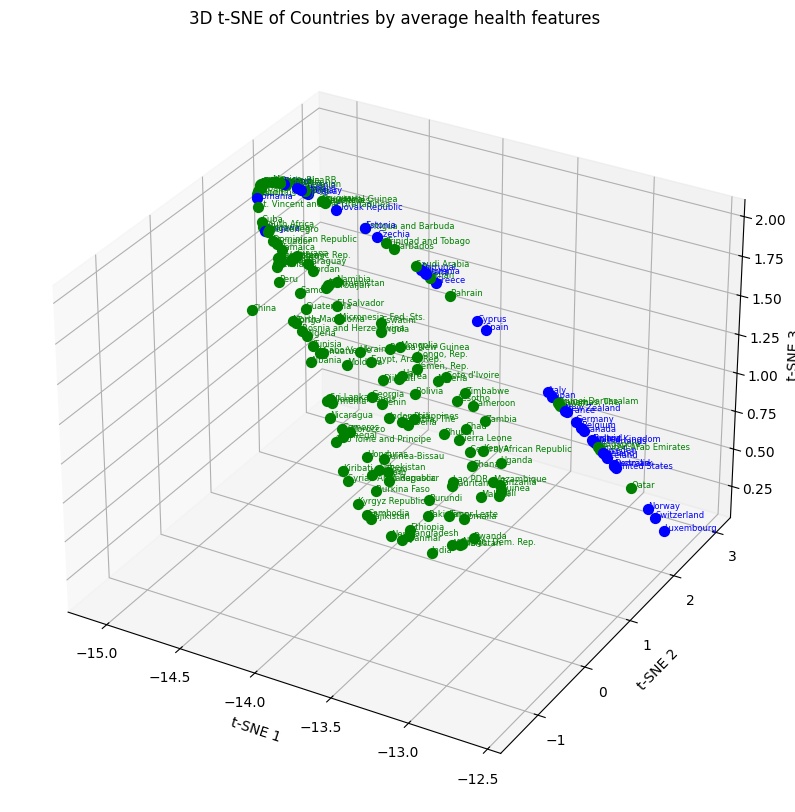

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
cmap = {1: 'blue', 0: 'green'}

for i in range(X.shape[0]):
    x, y, z = X_tsne[i]
    country = countries.iloc[i]
    color = cmap[int(X.economy_status_developed.iloc[i])]
    ax.scatter(x, y, z, c=color, s=50)
    ax.text(x, y, z, country, fontsize=6, color=color)

ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")
ax.set_title("3D t-SNE of Countries by average health features")
plt.show()
plt.show()

From the graph above we can see all the countries ploted. The blue are developed and green are developing. We can see that there is some overlap at some places. For example most of the developing countries can be seen to the left of -13.5 at tsne 1. While the developed countries are to the right. Within the group of developed countries we can see that there are some developing countries. I cannot see all of them but the countries I see are Qatar and United Arab Emirates. This is interesting to see because we saw that according to the dataset all countries in the middle east were developing. So its interesting to see that through tsne these countries are similar to developed countries in their. Additionally some of the developed countries haved ended up closer to the developing countries. Im glad we graphed it because we can clearly see from the given health data for each country there does seem to be exist some distinguishable features to be able to get this graph. Lets now move onto our final pivot table.

In our last pivot table lets look how the numerical columns look with respected to the economic status developed.

In [18]:
pd.pivot_table(data, index = 'economy_status_developed', values = numerical.drop(['economy_status_developed', 'economy_status_developing']))

,adult_mortality,alcohol_consumption,bmi,diphtheria,gdp_per_capita,hepatitis_b,incidents_hiv,infant_deaths,life_expectancy,measles,polio,population_mln,schooling,thinness_five_nine_years,thinness_ten_nineteen_years,under_five_deaths,year
economy_status_developed,,,,,,,,,,,,,,,,,
0,217.432966,3.458532,24.760519,83.977113,5771.368398,83.365757,1.107751,37.051849,66.341725,74.500440,84.319542,39.134956,6.66184,5.857967,5.808363,52.654269,2007.5
1,96.442355,10.254670,26.060590,95.105903,33752.071181,87.583333,0.074913,4.710764,78.442187,88.097222,94.883681,27.792500,11.32500,1.226042,1.251562,5.663194,2007.5


The pivot table above tells us a lot about the differences between developed and developing countries. For example
- On the average adult mortality for developed countries (1) is a lot lower at 96.44 compared to developing (0) which is 218.43
- average alcohol consumption is a lot higher than I expected for developed countries.
- gdp per capita is a lot higher for developed countries at 33752.0711 and for developing its 5771.3683
- incidents of hiv are a lot less in developed countries. Its very low at 0.07.
- same for infidant deaths and most health related issues
- more importantly for our goal of life expectancy prediction, life expectancy is 78.44 for developed countries and 66.34 for developing. That is a 12 year difference.

This lat pivot table gave us very important information on our data that we will keep in mind for our model building.

Now we are going to be ploting life expectancy against all other numerical columns to see if there is a relationship. We saw some of the categorical columns have some sort of relationship but now we want to check the numerical columns. We are using life expectancy because life expectancy is our column of interest.

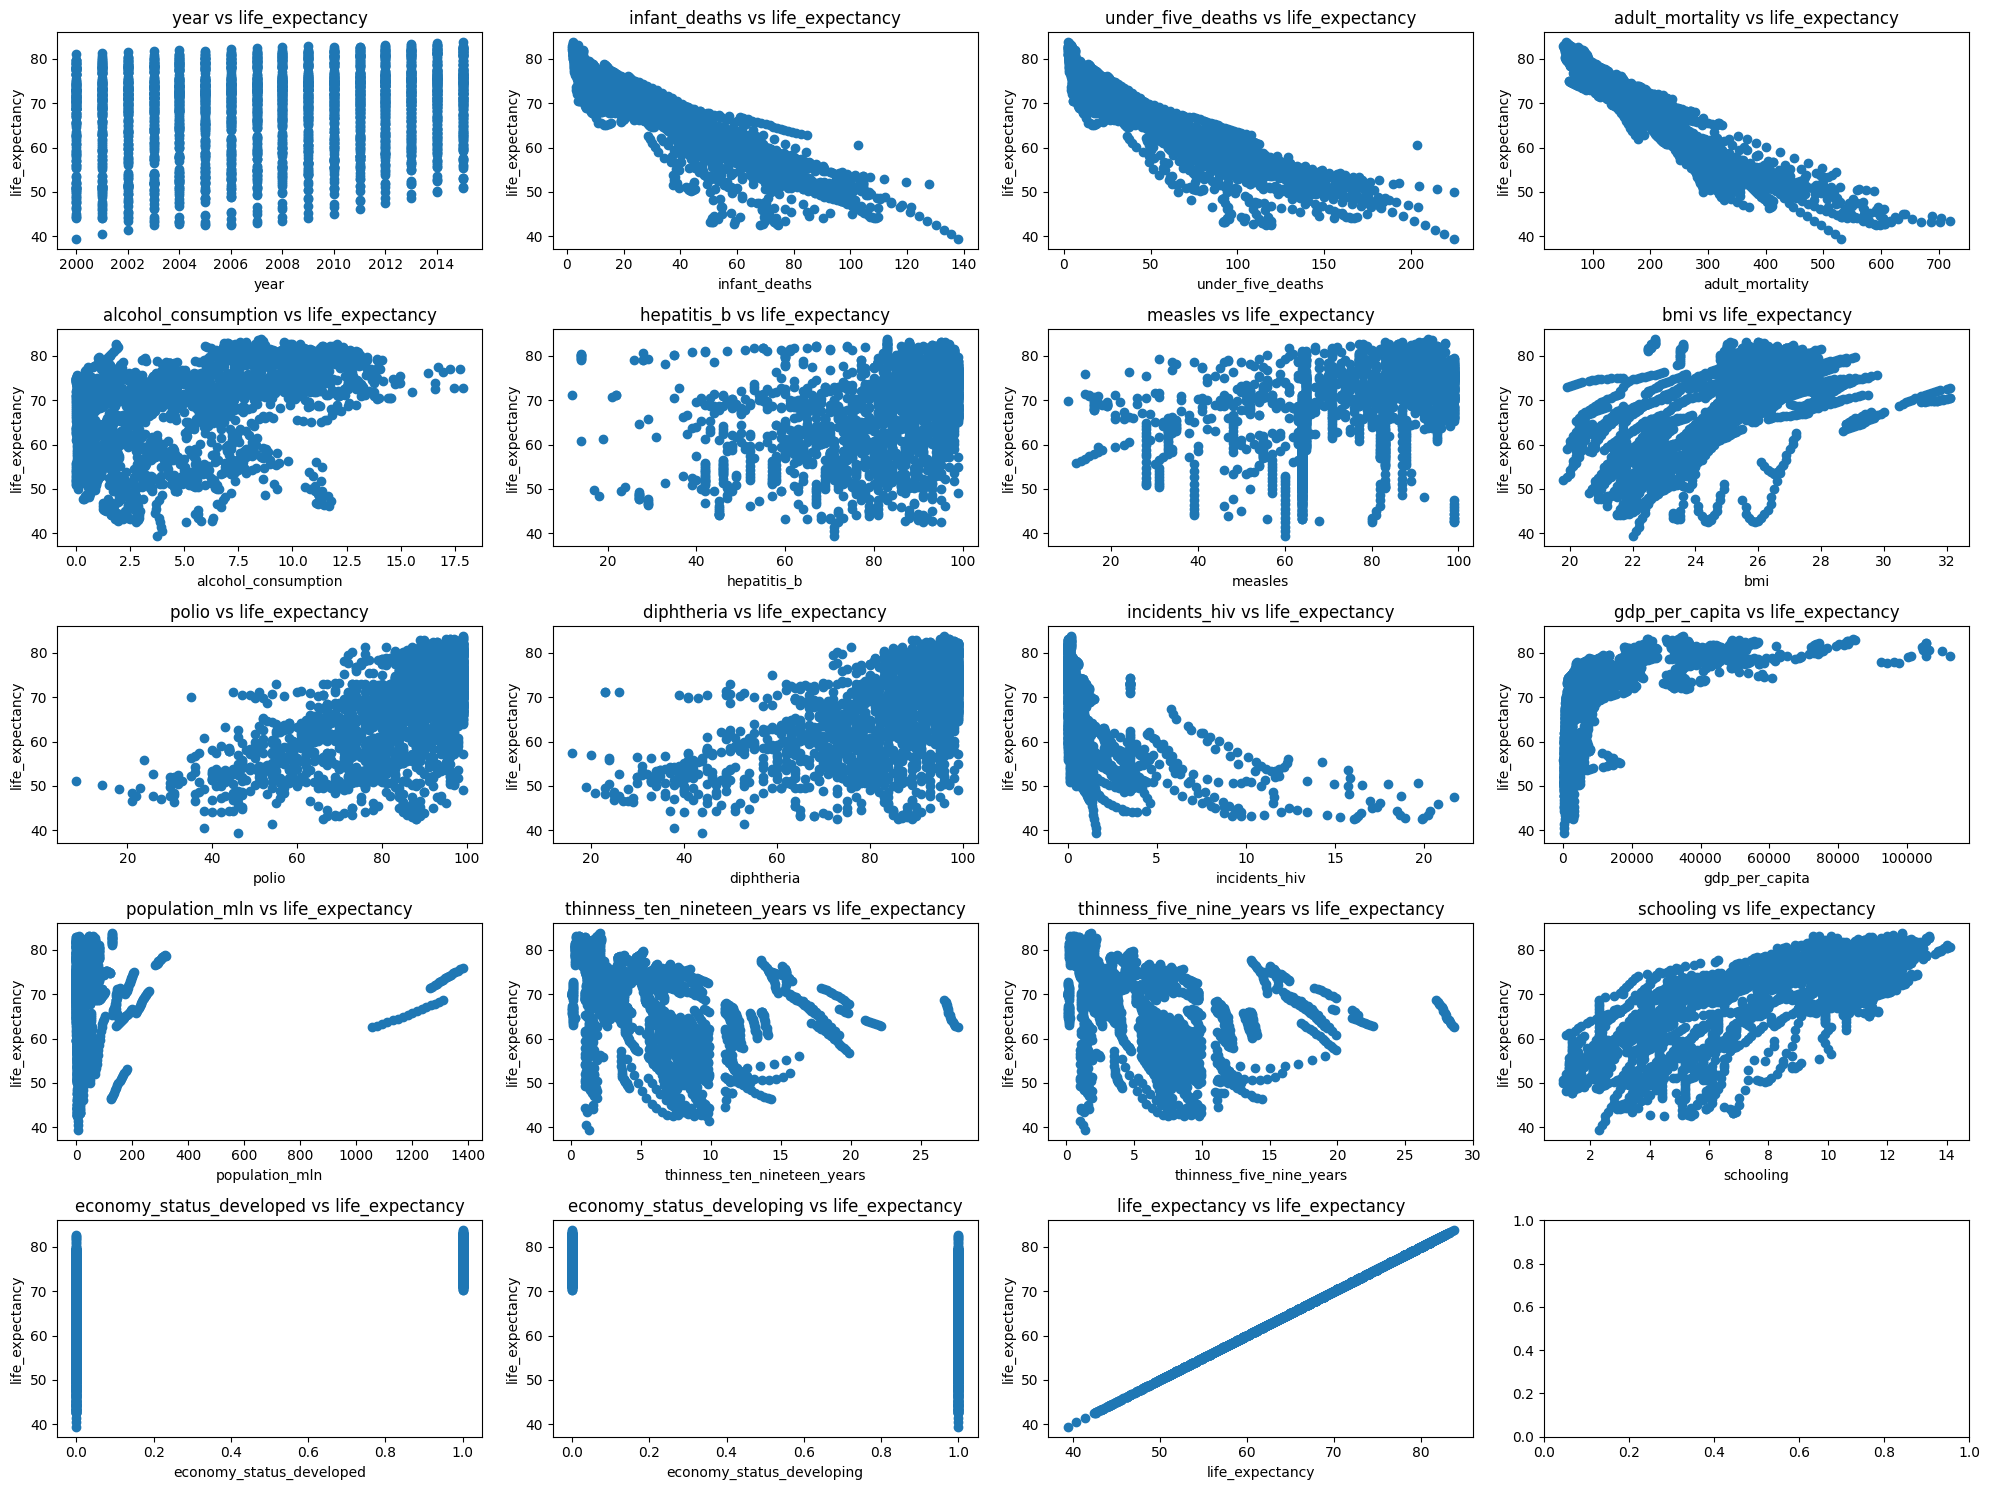

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(numerical):
    axes[i].scatter(data[col], data['life_expectancy'])  
    axes[i].set_title(f'{col} vs life_expectancy')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('life_expectancy')
plt.tight_layout()
plt.show()

From the graphs above there does not seem to be much of a relationship between life expectancy and the other columns in the dataset. By that I mean that there is no very noticable relationship. 

The columns that do seem to have a noticable relationship are infant deaths, under_five_deaths, adult mortality, gdp_per_capita. Of these adult mortality and income composition of resources seem to be the most coralated. It is also interesting to see infant deaths and under five deaths seem very similar they are very identical. There seems to be some sort of relationship between life expectancy and the dissease columns such as polio, diptheria and hiv indicdents. More notably the hiv incidents. Lastly we see that the economy status of a country is very important in determining life expectancy.

Now we move on to graphing the distribution of the columns. 

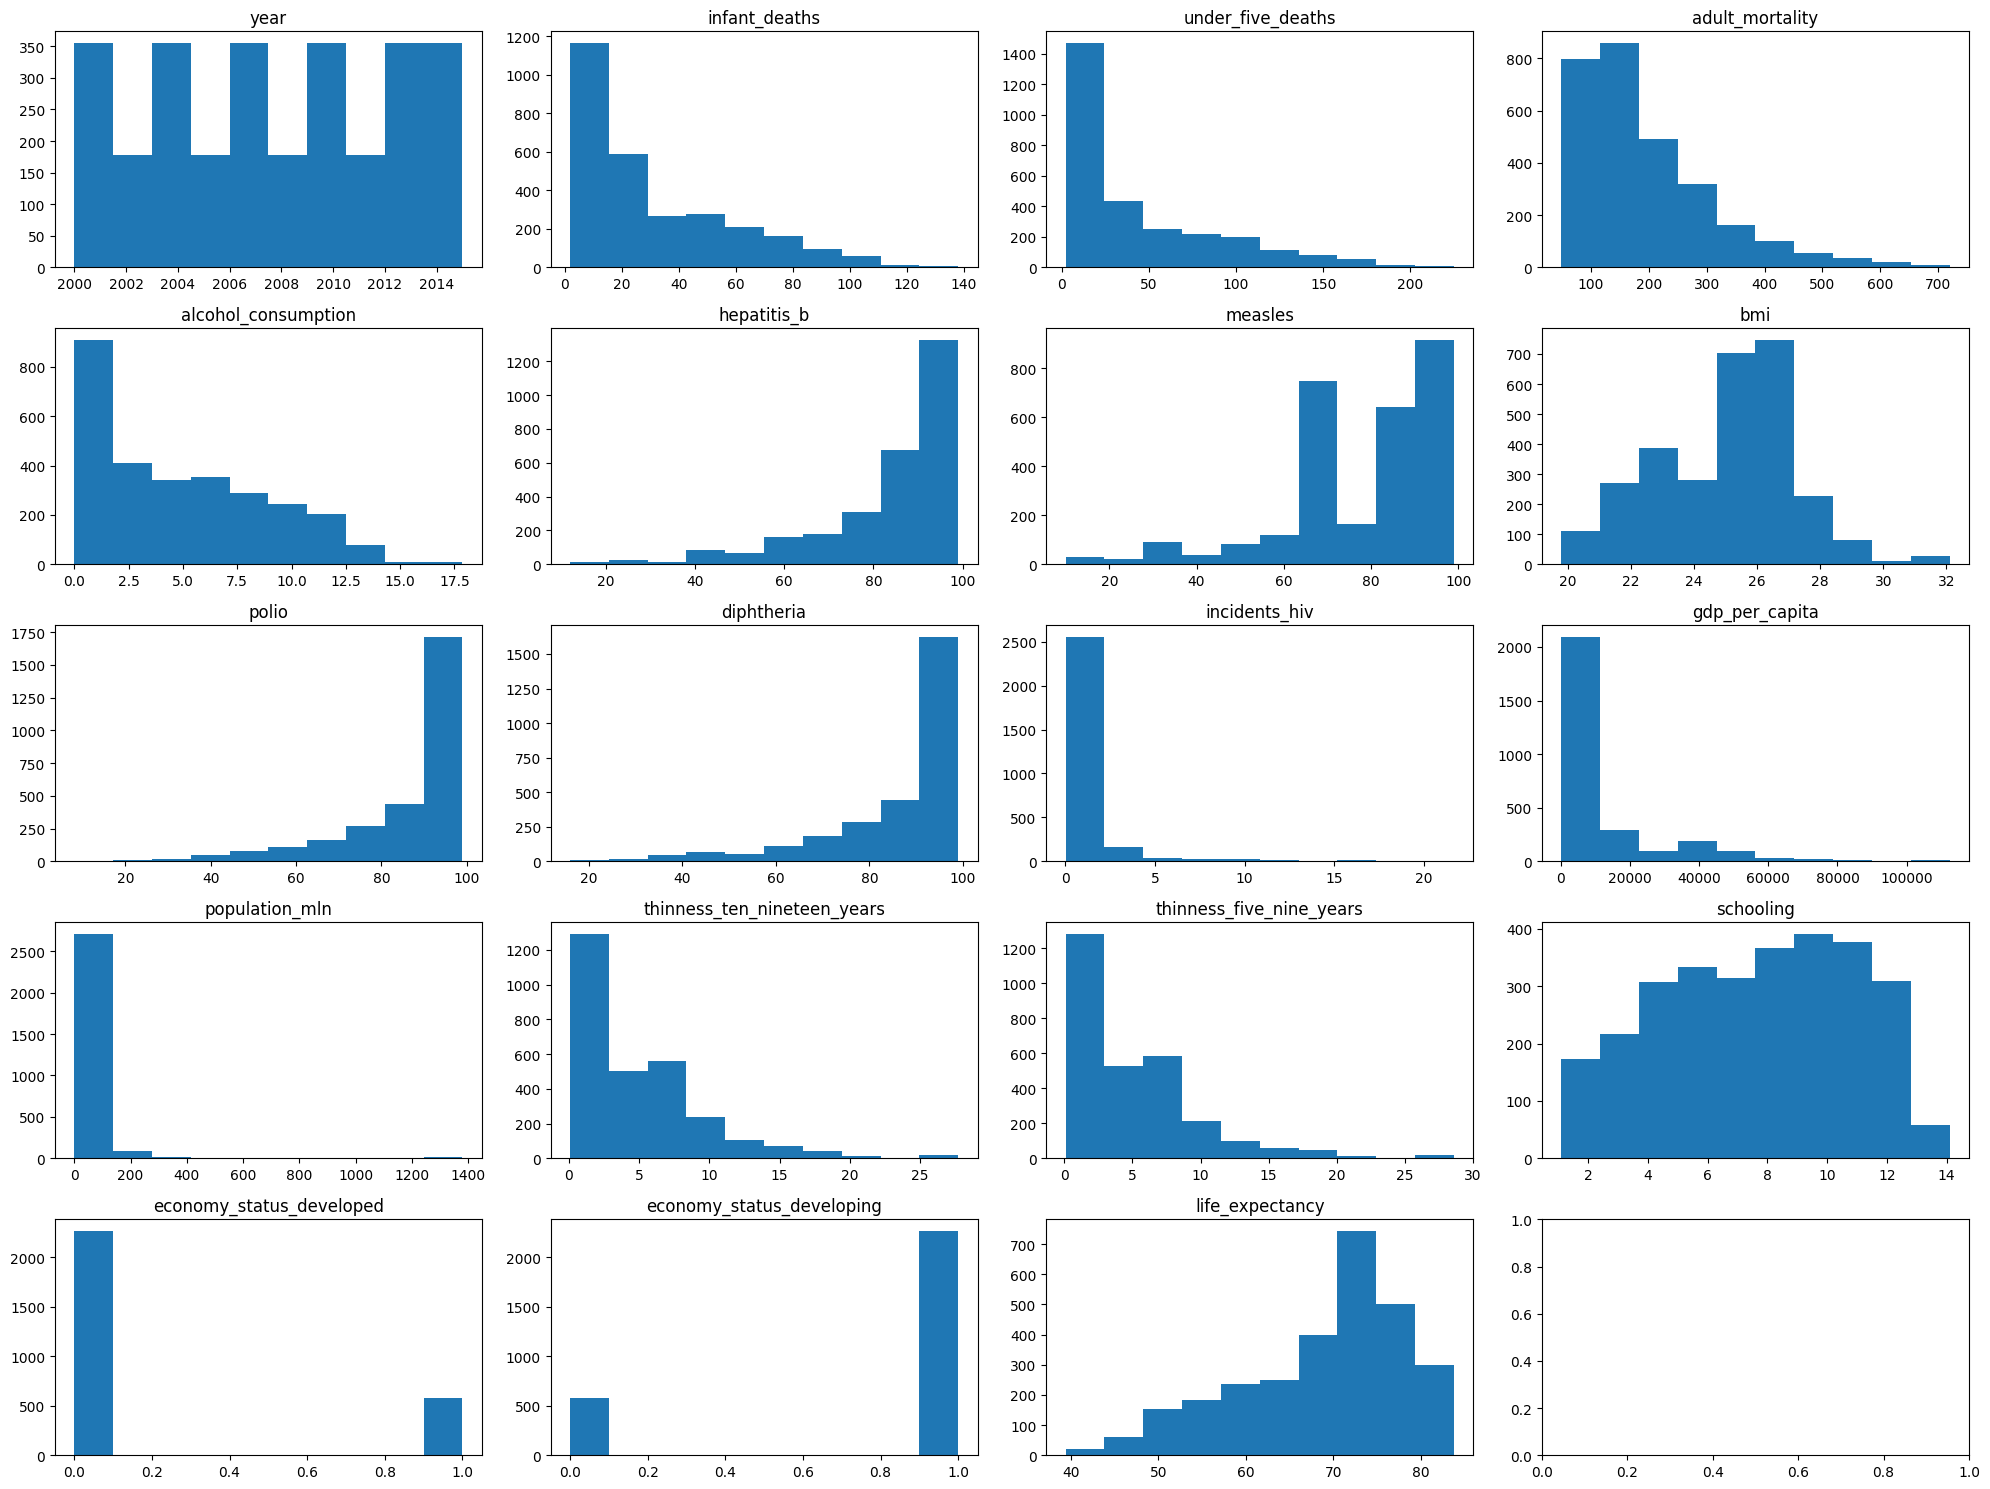

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))  
axes = axes.flatten()
for i, col in enumerate(numerical):
    axes[i].hist(data[col])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

Everything seems alright, theres no big outliers. We will standardize the data later and maybe apply a log transformation. Lets now count the number of developed and devloping countries. 

In [21]:
sum(data['economy_status_developed'])

576

In [22]:
sum(data['economy_status_developing'])

2272

We more samples developing countries than developed. However there are still a lot of samples that are developed. This will give the model plenty to learn from.

## Filling missing Values
Now that we have taken a look at our data, checked patterns, etc lets see what we can do about the missing values. First we must count how many values we are missing and where. 

In [23]:
data.isnull().sum()

country                        0
region                         0
year                           0
infant_deaths                  0
under_five_deaths              0
adult_mortality                0
alcohol_consumption            0
hepatitis_b                    0
measles                        0
bmi                            0
polio                          0
diphtheria                     0
incidents_hiv                  0
gdp_per_capita                 0
population_mln                 0
thinness_ten_nineteen_years    0
thinness_five_nine_years       0
schooling                      0
economy_status_developed       0
economy_status_developing      0
life_expectancy                0
dtype: int64

So there seems to be no missing values. On the kaggle site it mentioned this dataset updated missing values from the previous version however I still expected some missing values. Now I will just move onto data transformations.

So luckily for us our dataset is pretty clean. There are no missing values and the columns are already in int or floats. Now we will just encode any categorical columns if they are not already. We will also standardize each of the numerical columns. We could apply a log transformation to avoid outliers having a huge impact and hurting training but in the distributions tables of the columns that we looked at earlier there did not seem to be many outliers. For now we will just standardize which means making our columns have a mean of 0 and standard deviation of 1.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [25]:
data.columns

Index(['country', 'region', 'year', 'infant_deaths', 'under_five_deaths',
       'adult_mortality', 'alcohol_consumption', 'hepatitis_b', 'measles',
       'bmi', 'polio', 'diphtheria', 'incidents_hiv', 'gdp_per_capita',
       'population_mln', 'thinness_ten_nineteen_years',
       'thinness_five_nine_years', 'schooling', 'economy_status_developed',
       'economy_status_developing', 'life_expectancy'],
      dtype='object')

In [26]:
cols_to_standardize = numerical.drop(['year', 'economy_status_developing', 'economy_status_developed', 'life_expectancy'])

I added `life_expectancy` so that we don't standardize it. If we do it will be hard to interpret the predictions since this will be our label/target.

In [27]:
data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])

In [28]:
data.head()

,country,region,year,infant_deaths,under_five_deaths,adult_mortality,alcohol_consumption,hepatitis_b,measles,bmi,...,diphtheria,incidents_hiv,gdp_per_capita,population_mln,thinness_ten_nineteen_years,thinness_five_nine_years,schooling,economy_status_developed,economy_status_developing,life_expectancy
0,Turkiye,Middle East,2015,-0.704823,-0.676067,-0.758933,-0.880660,0.798483,-0.656353,1.264437,...,0.692133,-0.343070,-0.025092,0.304684,0.002981,-0.026760,0.061745,0,1,76.5
1,Spain,European Union,2015,-1.009832,-0.893571,-1.176304,1.383015,0.798483,0.897417,0.444718,...,0.692133,-0.338880,0.846169,0.070154,-0.965248,-0.976382,0.663209,1,0,82.8
2,India,Asia,2007,0.762124,0.554961,0.070665,-0.817989,-1.513018,-2.263701,-1.741199,...,-1.428192,-0.322122,-0.612199,8.378237,5.001741,5.096780,-0.824623,0,1,65.4
3,Guyana,South America,2006,0.083117,-0.059431,0.254608,0.212321,0.548591,-0.174148,0.125938,...,0.435124,-0.045609,-0.430687,-0.263771,0.183116,0.127829,0.093401,0,1,67.0
4,Costa Rica,Central America and Caribbean,2006,-0.752027,-0.716428,-0.851289,-0.161198,0.236226,0.468791,0.626878,...,0.178115,-0.309553,-0.137192,-0.237460,-0.650011,-0.667203,0.093401,0,1,78.2


I am not sure what to do with the categorical columns at this point. I am not sure as to how much they are going to help in the model training. I am not so sure how much country and year will help come up with a prediction. Region might be more helpful overall but I think for now I will only drop year. Altough I worry if country might cause the model to overfit.

In [29]:
data = pd.get_dummies(data, columns=['country', 'region'], dtype=int)

In [30]:
data.drop('year', axis=1, inplace=True)

In [31]:
data.head()

,infant_deaths,under_five_deaths,adult_mortality,alcohol_consumption,hepatitis_b,measles,bmi,polio,diphtheria,incidents_hiv,...,country_Zimbabwe,region_Africa,region_Asia,region_Central America and Caribbean,region_European Union,region_Middle East,region_North America,region_Oceania,region_Rest of Europe,region_South America
0,-0.704823,-0.676067,-0.758933,-0.880660,0.798483,-0.656353,1.264437,0.697878,0.692133,-0.343070,...,0,0,0,0,0,1,0,0,0,0
1,-1.009832,-0.893571,-1.176304,1.383015,0.798483,0.897417,0.444718,0.697878,0.692133,-0.338880,...,0,0,0,0,1,0,0,0,0,0
2,0.762124,0.554961,0.070665,-0.817989,-1.513018,-2.263701,-1.741199,-1.287758,-1.428192,-0.322122,...,0,0,1,0,0,0,0,0,0,0
3,0.083117,-0.059431,0.254608,0.212321,0.548591,-0.174148,0.125938,0.366938,0.435124,-0.045609,...,0,0,0,0,0,0,0,0,0,1
4,-0.752027,-0.716428,-0.851289,-0.161198,0.236226,0.468791,0.626878,0.168375,0.178115,-0.309553,...,0,0,0,1,0,0,0,0,0,0


We now have the data in the format that we want it in we just need to split it into train, validation and test sets.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = data.drop('life_expectancy', axis=1)

In [34]:
y = data.life_expectancy

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# split data into train and x and y temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# split x and y temp into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# 1. Convert to PyTorch tensors
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# If you're doing binary classification, ensure y is the right shape:
# For BCEWithLogitsLoss, y should be (N, 1)
y_val_tensor = y_val_tensor.view(-1, 1)
y_test_tensor = y_test_tensor.view(-1, 1)

# 2. Create TensorDatasets
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# 3. Create DataLoaders
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model Buidling & Evaluation
As mentioned in the project description I will be using polynomial regression and a neural network. I will evalute both and see which is best for our task. We will first start with polynomial regression.

In [47]:
import torch
import torch.nn as nn

ModuleNotFoundError: No module named 'torch'

In [46]:
class Network(nn.Module):
    def __init__(self, input_size, dropout_rate) -> None:
        """Function to initialize the cnn model

        Args:
            in_channels: The number of input chanels from our inputs
            classes: the number of classes/outputs
            kernel_size: the size of the kernels/matrices

        Returns:
            None
        """
        super().__init__()
        self.neural_network = nn.Sequential(
            nn.Linear(input_size, 500),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(500, 250),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(250, 125),
            nn.ReLU(),
            nn.Linear(125, 62),
            nn.ReLU(),
            nn.Linear(62, 1)
        )
    def forward(self, x):
        return self.neural_network(x)

NameError: name 'nn' is not defined

In [ ]:
EPOCHS = [25, 50, 100]
LR_RATES = [0.01, 0.001, 0.0001]
DROPOUT_RATES = [0, 0.25, 0.5]
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
def evaluate(model, device, loader):
    """Function to evaluate our model.

    Args:
        model: The model we are trying to train.
        loader: The data
        device: The device we will use
    Returns:
        accuracy
    """
    model.eval()
    correct = 0 # num correct samples
    num_samples = 0 # num samples 

    with torch.no_grad():
        for x, y in loader: 
            x = x.to(device)
            y = y.to(device)

            # shape: [batch_size, 1] ie batch size 4: torch.tensor([[0.2],[-1.5],[0.7],[-0.3]])
            outputs = model(x)  
             # apply sigmoid to get probabilities
            probs = torch.sigmoid(outputs) 
            # if prob is greater 0.5 true else false, .long() turns them inot 0 and 1
            # squeeze changess ([[0.2],[-1.5],[0.7],[-0.3]]) to [0.2, -1.5, 0.7, -0.3]
            predicted = (probs > 0.5).long().squeeze(1) 

            # compare predicted with truth, sum the correct number of truth (all ones)
            # .item makes it a single int instead of torch.tensor([int])
            correct += (predicted == y).sum().item()
            num_samples += y.size(0)

    accuracy = correct / num_samples
    return accuracy

In [ ]:

def train(model, train_loader, optimizer, epochs, device):
    """Function to train our convolutinal neural network.

    Args:
        model: The model we are trying to train.
        train_loader: The data for training.
        epochs: How many iterations of training we are going to do.
        optimizer: The optimizer for our network
    Returns:
        None
    """
    criterion = nn.BCEWithLogitsLoss() # set loss function for training
    model.train()  # set train mode
    
    for epoch in range(epochs):
        epoch_losses = [] # stores loss values for each batch in the current epoch
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # ensure labels are float and have shape [batch_size, 1]
            if labels.dim() == 1:
                labels = labels.unsqueeze(1)
            labels = labels.float().to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)  # outputs shape: [batch_size, 1], raw logits
            
            # loss bc even tho we are doing classification we are given 
            # a error value/how wrong our model was
            loss = criterion(outputs, labels) 
            loss.backward()
            optimizer.step()
            
            epoch_losses.append(loss.item())
        
        avg_loss = sum(epoch_losses) / len(epoch_losses)
        logger.info(f"Epoch {epoch+1} out of {epochs} completed. Average Loss: {avg_loss:.4f}")

In [ ]:
best_accuracy = 0
best_params = {}
for epoch in EPOCHS:
    for lr in LR_RATES:
        for dropout in DROPOUT_RATES:
            model = Network(X_train.shape[1], dropout)
            optimizer = optim.Adam(netwrok.parameters(), lr=lr)
            train(model=model, train_loader=train_dataset_loader, optimizer=optimizer, epochs=epoch, device=DEVICE)
            eval_accuracy = evaluate(model=model, device=DEVICE, loader=valid_dataset_loader)
            print(f'Validation Accuracy: {eval_accuracy}, Best Accuracy: {best_accuracy}')
            if eval_accuracy > best_accuracy:
                best_accuracy = eval_accuracy
                best_params = {'epoch': epoch, 'lr': lr, 'dropout': dropout}

# Conclusion